In [206]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [207]:
df= pd.read_csv('movie_dataset.csv')
df

,MovieTitle,ReleaseYear,Duration,Genre,Rating,Metascore,Votes,Gross
0,Bố Già,1972,175 min,"Crime, Drama",9.2,100,1987643,"134,966,411"
1,Câu Chuyện Tokyo,1953,136 min,Drama,8.1,100,67476,NaN
2,Bảy Võ Sĩ Đạo,1954,207 min,"Action, Drama",8.6,100,363320,"269,061"
3,Bố Già Phần II,1974,202 min,"Crime, Drama",9.0,100,1348889,"57,300,000"
4,Chuyện Tình Thế Chiến,1942,102 min,"Drama, Romance, War",8.5,100,600392,"1,024,560"
...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95 min,Drama,7.0,89,2188,"30,209"
996,We the Animals,2018,94 min,Drama,6.9,89,4595,"400,961"
997,David Holzman's Diary,1967,74 min,"Comedy, Drama",6.5,89,1823,NaN
998,Moonrise,1948,90 min,"Crime, Drama, Film-Noir",7.0,89,2938,NaN


## Data Cleaning

In [208]:
(df['ReleaseYear'].unique())

array(['1972', '1953', '1954', '1974', '1942', '1941', '1962', '1957',
       '1950', '1985', '1955', '1989–1990', '1994', '1931', '1952',
       '1993', '1959', '1990', '1945', '1936', '1960', '1975', '1949',
       '1988', '1964', '1979', '1956', '1928', '1939', '1948', '1966',
       '1924', '1976', '1969', '1927', '1937', '1982', '2001', '1958',
       '1991', '1989', '1944', '1920', '1973', '1984', '2016', '1902',
       '2010', '2011', '1946', '1963', '1995–1998', '1961', '1925',
       '1967', 'I 2019', '1940', '1943', '1965', '1929', '1981',
       'II 2018', '2012', '1970', 'I 2015', '2018', '1987', '1971',
       '1921', '1926', '1977', '2008', '1935', '1968', '2003', '1930',
       '1934', '1951', '2013', '1922', 'I 2014', '1984 TV Movie', '2014',
       '2006', '1938', '2000', '1974 TV Movie', '1933', '1983', '2019',
       '1978', '1999', '1947', '2017', '2007 TV Movie', '1923', '2015',
       '1980', '2007', '1932', '2002', 'I 2017', '1995', 'I 2011', '1997',
       '1992

In [209]:
# Handle cases where the year is provided with additional text (e.g., '1984 TV Movie').
# Take only Year from string: 
def take_only_year(input_strings):
    years= []
    for input_string in input_strings:
   # Check if input_string is a string
          parts= input_string.split()
          for part in parts:
             if part.isdigit() and len(part)==4:
                 years.append(int(part))
                 break
    return years

input_strings = ['I 2019', 'II 2018', 'I 2015', 'I 2014', '1984 TV Movie', '1974 TV Movie', '2007 TV Movie', 'I 2017', 'I 2011', 'I 2016', '1977 TV Movie', '2002 TV Special', 'II 2016', '1992 TV Movie', 'III 2015', 'I 2007', '1966 TV Movie', 'II 2011', 'II 2015', 'II 2014', 'I 2008', 'II 2017',
       '2006 TV Movie', 'I 2002', '1988 TV Movie']
new_strings= take_only_year(input_strings)
new_strings

[2019,
 2018,
 2015,
 2014,
 1984,
 1974,
 2007,
 2017,
 2011,
 2016,
 1977,
 2002,
 2016,
 1992,
 2015,
 2007,
 1966,
 2011,
 2015,
 2014,
 2008,
 2017,
 2006,
 2002,
 1988]

In [210]:
# Handle cases where multiple years are provided as a range (e.g., '1989–1990'). 
# Solution: tính trung bình của năm bắt đầu và năm kết thúc trong một dãy năm.
def clean_release_years(release_years):
    cleaned_years= []
    for year_range in release_years:
            start_year, end_year = map(int, year_range.split('–'))
            average_year= start_year + ((end_year- start_year)/2)
            cleaned_years.append(int(average_year))
    return cleaned_years

release_years = ['1989–1990', '1995–1998', '1989–1999']
new_release_year = clean_release_years(release_years)
new_release_year



[1989, 1996, 1994]

In [211]:
def replace_name(a,b):
    df.ReleaseYear.replace(a,b,inplace=True)

replace_name(input_strings,new_strings)
replace_name('1985– ', '1985')
replace_name(release_years, new_release_year)


df['ReleaseYear'].unique()

array(['1972', '1953', '1954', '1974', '1942', '1941', '1962', '1957',
       '1950', '1985', '1955', 1989, '1994', '1931', '1952', '1993',
       '1959', '1990', '1945', '1936', '1960', '1975', '1949', '1988',
       '1964', '1979', '1956', '1928', '1939', '1948', '1966', '1924',
       '1976', '1969', '1927', '1937', '1982', '2001', '1958', '1991',
       '1989', '1944', '1920', '1973', '1984', '2016', '1902', '2010',
       '2011', '1946', '1963', 1996, '1961', '1925', '1967', 2019, '1940',
       '1943', '1965', '1929', '1981', 2018, '2012', '1970', 2015, '2018',
       '1987', '1971', '1921', '1926', '1977', '2008', '1935', '1968',
       '2003', '1930', '1934', '1951', '2013', '1922', 2014, 1984, '2014',
       '2006', '1938', '2000', 1974, '1933', '1983', '2019', '1978',
       '1999', '1947', '2017', 2007, '1923', '2015', '1980', '2007',
       '1932', '2002', 2017, '1995', 2011, '1997', '1992', 2016, 1977,
       '1998', '1986', '2004', '1996', 2002, '2009', 1994, 1992, 1966,


In [212]:
# We need to remove min, change the datatype of duration to minutes (interger)
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)

In [213]:
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand= True)
df['Gross']= df['Gross'].replace(',','')
df['Gross'] = pd.to_numeric(df['Gross'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')  

In [214]:
# df.drop(columns = ['Genre'], inplace= True)

In [215]:
df.dtypes


MovieTitle      object
ReleaseYear     object
Duration         int32
Genre           object
Rating         float64
Metascore        int64
Votes            int64
Gross          float64
Genre_1         object
Genre_2         object
Genre_3         object
dtype: object

In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,1.177170e+02,6.129840e+01,13.0,94.00,107.0,127.0,931.0
Rating,1000.0,7.804700e+00,3.995843e-01,5.7,7.50,7.8,8.1,9.3
Metascore,1000.0,8.930000e+01,5.517286e+00,83.0,84.00,88.0,94.0,100.0
Votes,1000.0,1.551179e+05,3.296935e+05,33.0,8510.25,26588.0,110312.0,2852749.0
Gross,576.0,4.284013e+07,1.025510e+08,1392.0,336431.00,3508790.0,27360075.0,936662225.0


<Axes: >

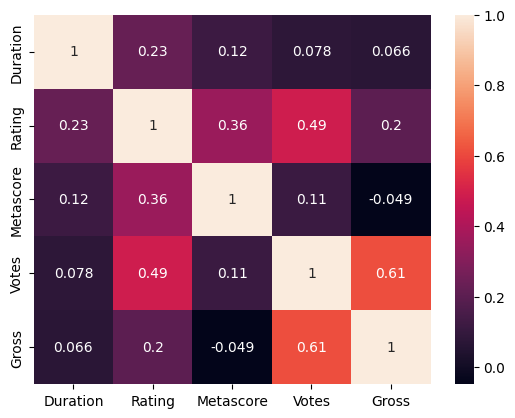

In [217]:
correlationMatrix= df.corr()
sns.heatmap(correlationMatrix, annot= True)

From this corr chart, we cans ee that the corr value of gross with the votes has 0.61 and corr between gross and metascore has -0.049
* This explains that gross is strongly correlated with the votes and metascore is least correlated. 
* => So we cans ay that Votes is directly related for the gross generated 

## Predict the null value of Gross column based on release year, duration, genre, rating, and metascore

Text(0.5, 1.0, 'Distribution of Gross')

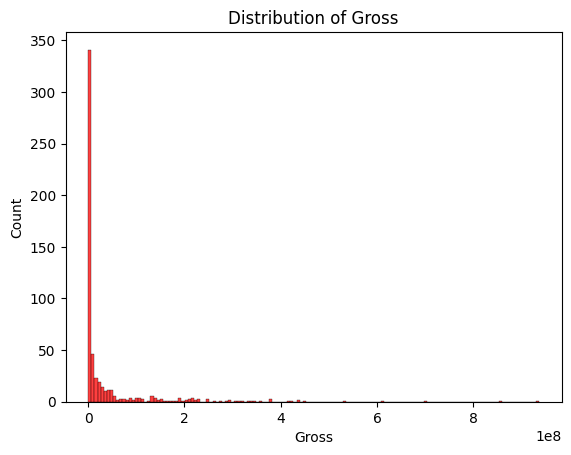

In [218]:
sns.histplot(data= df['Gross'], color= 'red')
plt.title("Distribution of Gross")

Skewed data is not a good fit for modeling in Linear Regression

- Because they may act as an outlier, and we know that outlier is not good for our model performance.
- They have uneven mean, median, mode and by the law of large numbers, normal distribution allows the researcher to make more accurate predictions.
- To linearize the fit as much as possible. The statistical test is usually based on the assumption of normality(normal distribution).

### Convert categorical variables into numerical variables format using techniques one-hot encoding:

In [219]:
# Concatenate all 'Genre' columns into a single DataFrame
genres_df= pd.concat([df['Genre_1'], df['Genre_2'], df['Genre_3']], axis= 1)
# Reshape the DataFrame to have each genre in a separate row
genres_df = genres_df.melt(value_name='Genre').dropna()  
# Strip whitespace from the 'Genre' column
genres_df['Genre'] = genres_df['Genre'].str.strip()

In [220]:
genres_df

,variable,Genre
0,Genre_1,Crime
1,Genre_1,Drama
2,Genre_1,Action
3,Genre_1,Crime
4,Genre_1,Drama
...,...,...
2989,Genre_3,Sci-Fi
2990,Genre_3,Comedy
2991,Genre_3,Romance
2998,Genre_3,Film-Noir


In [221]:
# One-hot encode the 'Genre' column
one_hot_encoded= pd.get_dummies(genres_df, columns= ['Genre'], dummy_na= True)
one_hot_encoded

,variable,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Genre_1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Genre_1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Genre_1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Genre_1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Genre_1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,Genre_3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2990,Genre_3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2991,Genre_3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2998,Genre_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
# Merge the one-hot encoded DataFrame back to the original DataFrame
df= pd.concat([df, one_hot_encoded.drop(columns= ['variable'])], axis= 1)
df.drop(columns= ['Genre'], inplace= True)
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
# Drop rows with NaN values:
df.dropna(subset= ['MovieTitle'], inplace= True)

In [224]:
df

,MovieTitle,ReleaseYear,Duration,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3,...,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Genre_nan
0,Bố Già,1972,175.0,9.2,100.0,1987643.0,134966411.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Câu Chuyện Tokyo,1953,136.0,8.1,100.0,67476.0,NaN,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bảy Võ Sĩ Đạo,1954,207.0,8.6,100.0,363320.0,269061.0,Action,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bố Già Phần II,1974,202.0,9.0,100.0,1348889.0,57300000.0,Crime,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chuyện Tình Thế Chiến,1942,102.0,8.5,100.0,600392.0,1024560.0,Drama,Romance,War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95.0,7.0,89.0,2188.0,30209.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,We the Animals,2018,94.0,6.9,89.0,4595.0,400961.0,Drama,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,David Holzman's Diary,1967,74.0,6.5,89.0,1823.0,NaN,Comedy,Drama,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,Moonrise,1948,90.0,7.0,89.0,2938.0,NaN,Crime,Drama,Film-Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
